In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

##c9be99ff

In [2]:
df = pd.read_csv("/content/business_reviews.csv")

In [ ]:
# first, we install pandas-profiling
## install using conda on pc
## pip or conda package managers work in the console or terminal
## you can use on a Jupyter notebook by placing a !
## one time statement in pc
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

import pandas as pd
pd.set_option('display.max_colwidth', None) ## to display all columns

# next we import ProfileReport
from pandas_profiling import ProfileReport

# next, we make an instance of the ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

## for notebooks we use the to_notebook_iframe() method
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56061 entries, 0 to 56060
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    56061 non-null  int64  
 1   review_id     56061 non-null  object 
 2   user_id       56061 non-null  object 
 3   business_id   56061 non-null  object 
 4   stars_x       56061 non-null  int64  
 5   useful        56061 non-null  int64  
 6   funny         56061 non-null  int64  
 7   cool          56061 non-null  int64  
 8   text          56061 non-null  object 
 9   date          56061 non-null  object 
 10  name          56061 non-null  object 
 11  address       56061 non-null  object 
 12  city          56061 non-null  object 
 13  state         56061 non-null  object 
 14  postal_code   56061 non-null  int64  
 15  latitude      56061 non-null  float64
 16  longitude     56061 non-null  float64
 17  stars_y       56061 non-null  float64
 18  review_count  56061 non-nu

In [4]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,49,cvQXRFLCyr0S7EgFb4lZqw,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5,3,1,1,"On a scale of one to things that are awesome, ...",10/14/2009 1:15,...,PA,19103,39.951417,-75.173768,4.0,1553,1,"{'RestaurantsReservations': 'False', 'Restaura...","Bars, Nightlife, Whiskey Bars, Burgers, Restau...","{'Wednesday': '16:0-21:0', 'Thursday': '16:0-2..."
1,102,8GZbCEMxrbqmRinDbfHWVQ,OkjeFppodgJP_CvB84cJYw,FHNIvNgh3fS7VZQq2Y3dsA,3,1,0,1,After trying a few ramen places with crazy var...,7/13/2014 18:28,...,PA,19107,39.946795,-75.157702,4.0,818,0,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Asian Fusion, Tapas/Small Plates, American (Ne...","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2..."
2,134,mSggForidMf0eUaK-Qnnvg,x-LrGPXN7WFX15Qk9B6_YQ,eMiN8nm70jjKg8izikVWDA,4,0,1,0,"Oh Chickie's and Pete's, you are the perfect p...",7/16/2012 13:25,...,PA,19145,39.911417,-75.174511,3.5,590,1,"{'GoodForKids': 'True', 'Corkage': 'False', 'H...","Seafood, Nightlife, Sports Bars, Bars, Restaur...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
3,314,hozoa1DsTCjpz4UC8YGsNw,ndgHYecgAWEqtjnjE7LtfA,MMRRS6YhVRx_iN5-JhMRYg,4,0,0,0,The new Han Dynasty took over the spot where t...,10/8/2012 15:29,...,PA,19104,39.956711,-75.197103,4.0,783,1,"{'BikeParking': 'True', 'Caters': 'True', 'Hap...","Restaurants, Chinese, Szechuan","{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:..."
4,326,tfucaiy6lG5UbvbmTD4STg,wABHp4fGUC-0acRKhmQO2A,MMRRS6YhVRx_iN5-JhMRYg,5,0,0,0,"Awesome food, great place to split a bunch of ...",3/7/2016 0:22,...,PA,19104,39.956711,-75.197103,4.0,783,1,"{'BikeParking': 'True', 'Caters': 'True', 'Hap...","Restaurants, Chinese, Szechuan","{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:..."


## Frequency of Stars_x Rating

In [5]:
def starsx_freq(df):
  # create bar graph
  sns.countplot(data = df, x= "stars_x",color="#c9be99ff")
  plt.ylabel("Stars Counts")
  plt.title("Frequency of Rating")
  plt.show()

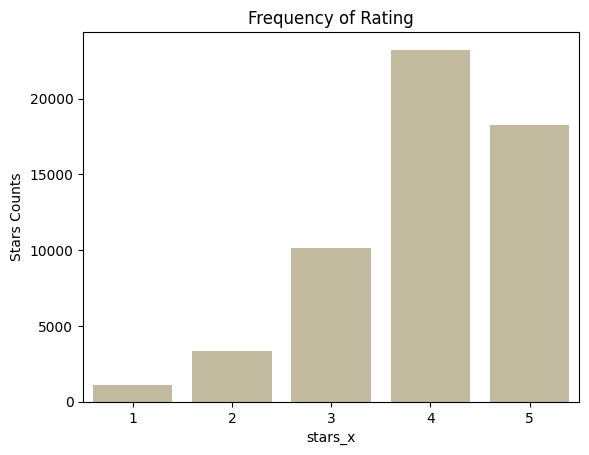

In [6]:
starsx_freq(df)

## Frequency of Stars_y Rating

In [7]:
def starsy_freq(df):
  # create bar graph
  sns.countplot(data = df, x= "stars_y",color="#c9be99ff")
  plt.ylabel("Stars Counts")
  plt.title("Frequency of Rating")
  #ax.bar_label(ax.containers[0])
  plt.xticks(rotation=90)
  plt.show()

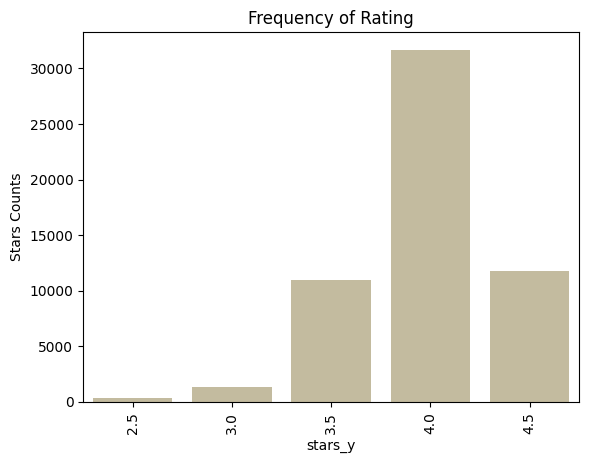

In [8]:
starsy_freq(df)

## Theme Words?

In [9]:
def word_counts(df):
  df=df.copy()
  df = df[["useful", "funny", "cool"]]
  # create bar graph
  sns.countplot(data = df,color="#c9be99ff")
  plt.ylabel("Frequency")
  plt.title("Frequency of Theme")
  #ax.bar_label(ax.containers[0])
  plt.xticks(rotation=90)
  plt.show()

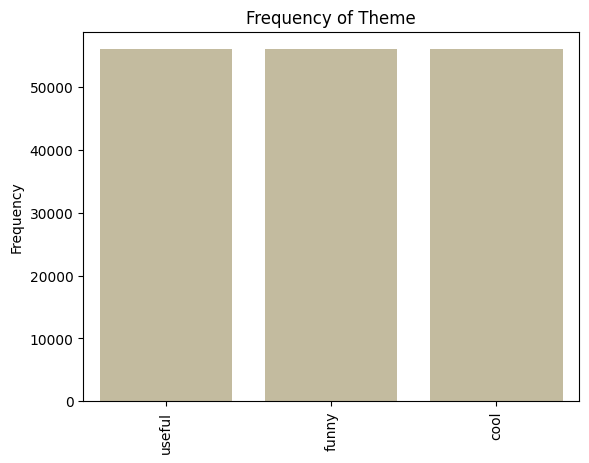

In [10]:
word_counts(df)

## Number of Reviews by Stars

In [11]:
def reviews_freq(df):
  # create bar graph
  sns.barplot(data = df, x= "stars_x", y = "review_count", color="#c9be99ff")
  plt.ylabel("Number of Reviews")
  plt.title("Number of Reviews per Rating")
  plt.show()

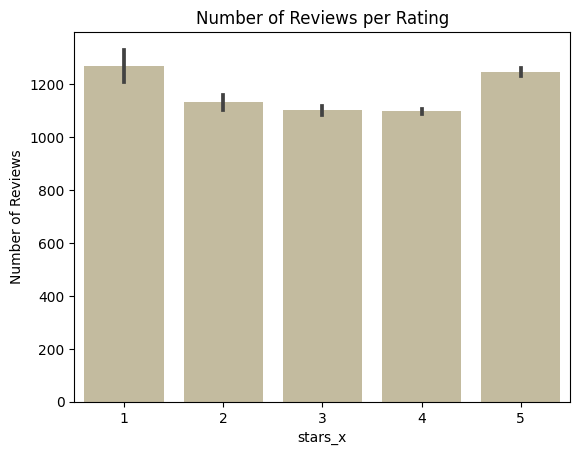

In [12]:
reviews_freq(df)

<ipython-input-13-74334d8c92e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


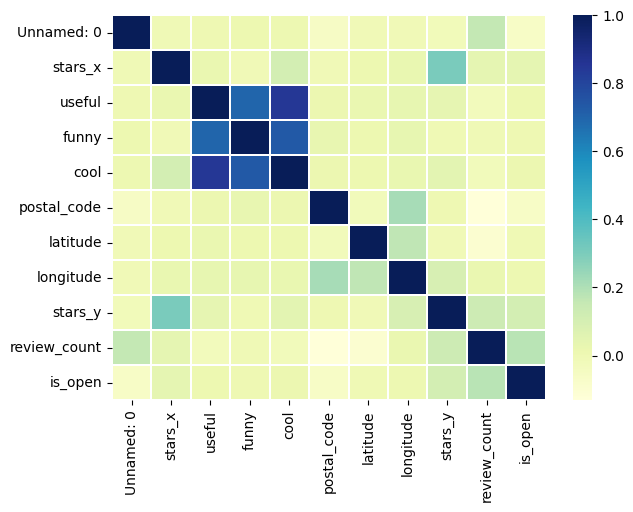

In [13]:
corrmat = df.corr()
  
f, ax = plt.subplots(figsize =(7, 5))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1);